In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [40]:
df = pd.read_csv('baselineDF.csv')

In [41]:
df

,Unnamed: 0,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,is_arr_delayed,op_unique_carrier_9E,op_unique_carrier_AA,...,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,year,month,day,weekday
0,10,14100,12889,1945,2244,359.0,2176.0,0,0,0,...,0,0,0,0,0,0,2018,12,1,5
1,11,12889,14100,1110,1855,285.0,2176.0,1,0,0,...,0,0,0,0,0,0,2018,12,1,5
2,12,10397,11697,1739,1930,111.0,581.0,0,0,0,...,0,0,0,0,0,0,2018,12,1,5
3,13,12892,10397,930,1649,259.0,1947.0,0,0,0,...,0,0,0,0,0,0,2018,12,1,5
4,14,10397,12892,1120,1330,310.0,1947.0,1,0,0,...,0,0,0,0,0,0,2018,12,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99087,99995,14574,11057,1615,1733,78.0,155.0,0,0,0,...,0,0,0,0,0,0,2018,12,5,2
99088,99996,10135,14100,540,626,46.0,55.0,1,0,0,...,0,0,0,0,0,0,2018,12,5,2
99089,99997,10721,13230,1915,2057,102.0,335.0,1,0,0,...,0,0,0,0,0,0,2018,12,5,2
99090,99998,13230,14100,1229,1319,50.0,84.0,1,0,0,...,0,0,0,0,0,0,2018,12,5,2


In [42]:
y = df['is_arr_delayed']
X = df.drop(['is_arr_delayed'], axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [44]:
rc = RandomForestClassifier(bootstrap=True, n_estimators=600, max_depth=30, min_samples_split=5, min_samples_leaf=2)

In [45]:
clf = rc.fit(X_train, y_train)

In [46]:
y_pred = clf.predict(X_test)

In [47]:
con_mat = confusion_matrix(y_test, y_pred)
y_score = clf.predict(X_test)
con_mat

array([[12073,   927],
       [ 4695,  2124]], dtype=int64)

In [48]:
AUC = roc_auc_score(y_test, y_score)
AUC

0.6200874648888287

In [49]:
clf.score(X_test, y_test)

0.7163328119481306

In [50]:
pred_proba = clf.predict_proba(X_test)

In [51]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_proba[:,1], pos_label=1)

In [52]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

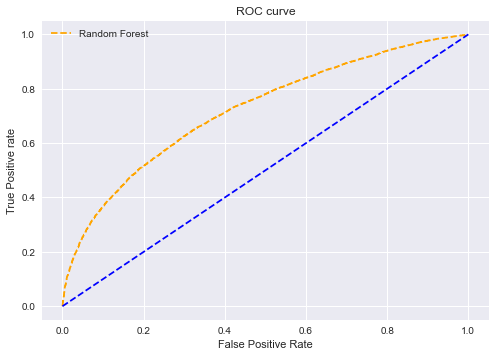

In [53]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [18]:
# n_estimators = [100, 300, 500, 800, 1200]
n_estimators = [600]
max_depth = [30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [19]:
grid = GridSearchCV(clf, param_grid, cv = 3, verbose = 1, 
                      n_jobs = -1)

In [20]:
bestF = grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.5min finished


In [21]:
print('Best n_estimators:', bestF.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', bestF.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', bestF.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', bestF.best_estimator_.get_params()['min_samples_leaf'])

Best n_estimators: 300
Best max_depth: 30
Best min_samples_split: 5
Best min_samples_leaf: 2


In [22]:
pred_proba_bestF = bestF.predict_proba(X_test)

In [23]:
pred_proba_bestF

array([[0.66664558, 0.33335442],
       [0.30376173, 0.69623827],
       [0.69727743, 0.30272257],
       ...,
       [0.81465534, 0.18534466],
       [0.8052681 , 0.1947319 ],
       [0.64174349, 0.35825651]])